<a href="https://colab.research.google.com/github/ekkalaks/CS701_stock_prediction/blob/main/Case_Study_1_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function and modules for supervised regression models

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

Function and modules for data analysis and model evaluation

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

Funtion and modules for deep learning models

In [3]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import gradient_descent_v2 #instead of : SDG
#instead of: from keras.optimizers we uses tensorflow.keras.optimizers
from tensorflow.keras.optimizers import SGD 
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

Function and modules for time series models

In [4]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Function and modules for data preparation and visulization

In [5]:
# pandasm pandas_datareader, numpy and matplotlib
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import yfinance as yf
#yf.pdr_override()

Loading the Data

In [14]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers, start='2017-01-01')
#stk_data = web.get_data_yahoo(stk_tickers)
ccy_data = web.DataReader(ccy_tickers, 'fred', start='2017-01-01')
idx_data = web.DataReader(idx_tickers, 'fred', start='2017-01-01')

[*********************100%***********************]  3 of 3 completed


In [24]:
print(stk_data.isnull().sum())
print(stk_data.shape)

Adj Close  GOOGL    0
           IBM      0
           MSFT     0
Close      GOOGL    0
           IBM      0
           MSFT     0
High       GOOGL    0
           IBM      0
           MSFT     0
Low        GOOGL    0
           IBM      0
           MSFT     0
Open       GOOGL    0
           IBM      0
           MSFT     0
Volume     GOOGL    0
           IBM      0
           MSFT     0
dtype: int64
(1203, 18)


In [25]:
print(ccy_data.isnull().sum())
print(ccy_data.shape)

DEXJPUS    54
DEXUSUK    54
dtype: int64
(1240, 2)


In [26]:
print(idx_data.isnull().sum())
print(idx_data.shape)

SP500     44
DJIA      44
VIXCLS    44
dtype: int64
(1246, 3)


In [30]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1] + '_pred'

In [46]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('IBM', 'GOOGL'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [47]:
dataset.head()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-03-30,0.000304,0.011639,-0.005507,0.002157,-0.002958,0.009376,0.003475,-0.128319,0.012866,0.015026,0.018121,0.054850
2017-05-08,-0.007425,0.027356,-0.027542,0.009438,0.001934,0.004616,0.004714,-0.034209,-0.006795,0.051491,0.059157,0.079460
2017-06-14,0.000000,-0.034094,0.018571,-0.003475,-0.010331,0.001963,0.009442,0.023777,-0.029724,0.022887,0.019615,0.084751
2017-07-21,-0.010216,0.017182,-0.047533,-0.013224,-0.008523,0.005381,-0.002669,-0.015899,0.013782,0.074536,0.025252,0.089934
2017-08-25,0.015263,0.004653,0.028509,-0.000732,0.002022,0.007189,0.006400,-0.234427,0.004542,0.007238,0.005863,0.043381


Data Visualization

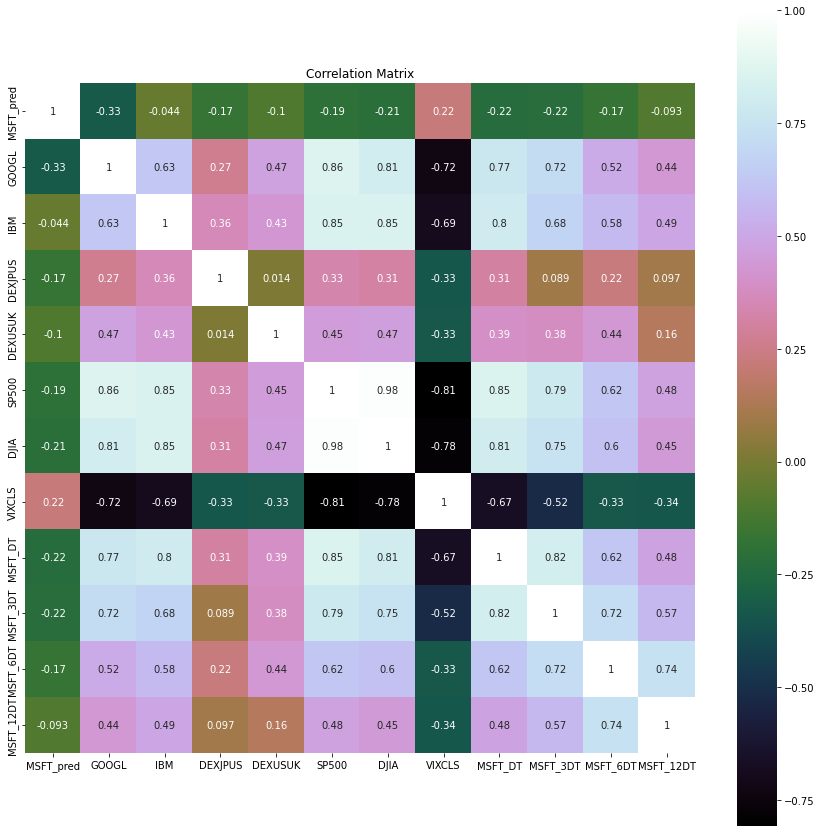

In [48]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

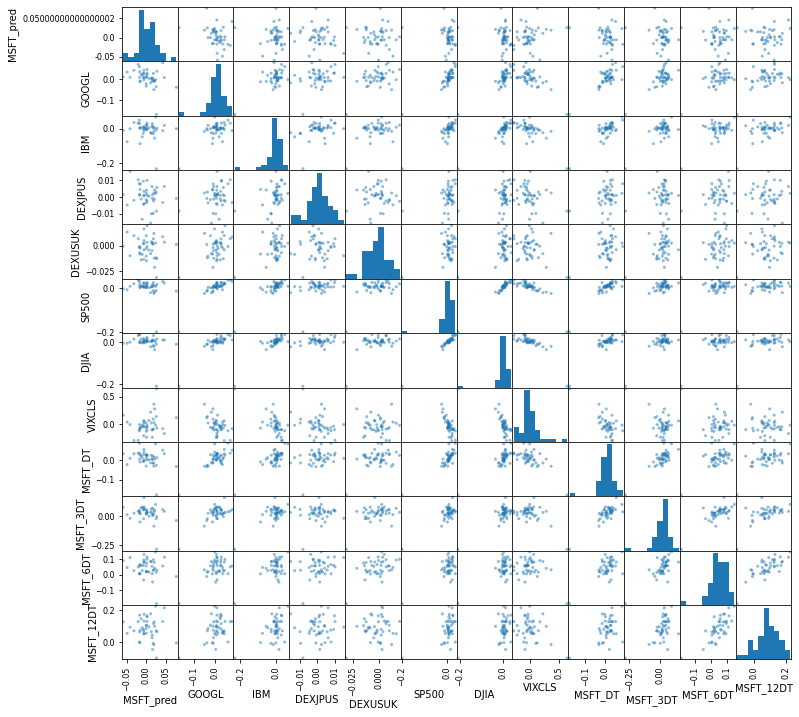

In [49]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset, figsize=(12,12))
pyplot.show()

Time series analysis

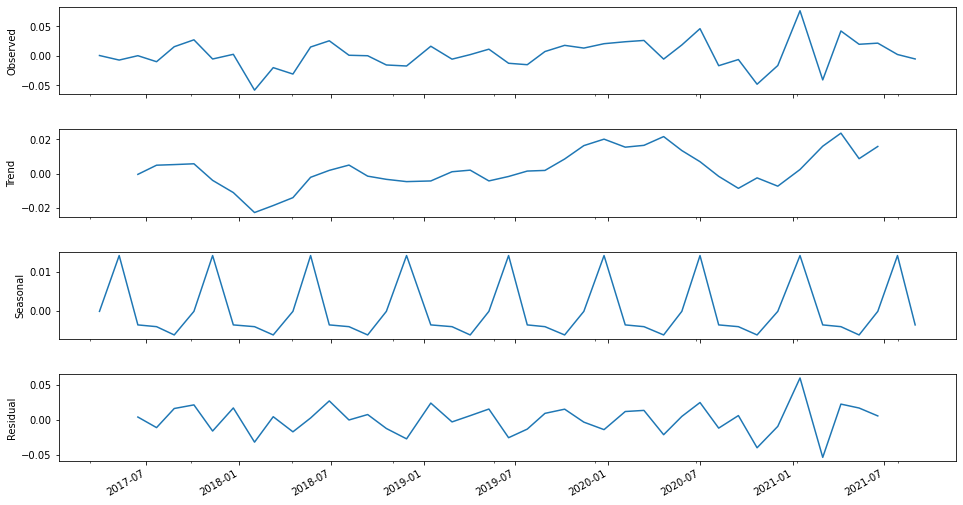

In [69]:
res = sm.tsa.seasonal_decompose(Y, freq=5)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()